## Final Project Submission

Please fill out:
* Student Name: Sharon Chebet
* Student Pace: Part-time 
* Scheduled Project Review Date/Time: June 2024 
* Instructor Name: Samuel Karu 


# Overview

##  Business Understanding



### Objectives


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Questions to consider 




* Which studio has the highest total gross ?

* Which release date or periods yield the highest returns ?


* How does production budget correlate with profit ?


* How does foreign gross correlates with domestic gross ?

*  Which market contributes more significantly to the overall financial sucCess of movies ?


## Task 1 : Data Understanding.




Dataset
For this project  We will consider the following datasets:


*bom_movie - bom.movie_gross.csv

*tmdb_movies - tmdb.movies.csv

*rt_movies - rt.reviews.tsv

*tn_movies - tn.movie_budgets.csv


After  initial Analysis i have noted that tmdb movies and rt_movies have insufficient information  and dropping them wont affect the results. For this reason we will focus on the following datasets in our analysis <b>bom_movies</b>  and <b>tn_movies</b>. 




Dataset Overview

The dataset includes the following columns:

<b>*movie/title:</b> The title of the movie.

<b>*releasedate:</b> The date when the movie was released.

<b>*production_budget:</b> The amount of money spent on producing the movie.

<b>*domestic_gross:</b> The revenue generated from domestic box office sales.

<b>*foreign_gross:</b> The revenue generated from foreign box office sales.

<b>*worldwide_gross:</b> The total revenue generated from both domestic and international box office sales.


## Import relevant libraries

In [564]:
import pandas as pd
import numpy as np
from numbers import Number
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read  the datasets into a pandas DataFrame

In [565]:
## Read `bom_movie.csv` into a pandas DataFrame named `df`
bom_movie_df= pd.read_csv('Data/bom.movie_gross.csv')
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [566]:
###  Read `tmdb_movies.csv` into a pandas DataFrame named tmdb_movies_df
tmdb_movies_df= pd.read_csv('Data/tmdb.movies.csv')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [567]:
# Read `Data/tn.movie_budgets.csv` into a pandas DataFrame named tn_movies_df
tn_movies_df= pd.read_csv('Data/tn.movie_budgets.csv')
tn_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [568]:
# Read `Data/tn.movie_budgets.csv` into a pandas DataFrame named rt_movies_df
rt_movies= np.loadtxt('Data/rt.movie_info.tsv', delimiter='\t', dtype=str)
print(rt_movies)

[['id' 'synopsis' 'rating' ... 'box_office' 'runtime' 'studio']
 ['1'
  '"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City\'s dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier\'s right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye\'s suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smu

In [569]:
rt_movies_df = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Exploratory Data Analysis (EDA)
* bom_movie _df

In [570]:
# lets get a concise summary of the bom_movies
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Dealing  with null values

For domestic gross and foreign gross we will replace the null values with 0 as the null values indicate that the movie was not sold domestically or abroad respectively.

In [571]:
# fill the null values
bom_movie_df['domestic_gross'].fillna(0,inplace =True)
bom_movie_df['foreign_gross'].fillna(0,inplace =True)
# check for missing values
bom_movie_df.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Add new column  total_gross which is the sum of domestic goss and foreign gross

In [572]:
# Convert 'Domestic Gross' and 'Foreign Gross' to numeric, handling errors
bom_movie_df['domestic_gross'] = pd.to_numeric(bom_movie_df['domestic_gross'], errors='coerce')
bom_movie_df['foreign_gross'] = pd.to_numeric(bom_movie_df['foreign_gross'], errors='coerce')
# Calculate total gross
bom_movie_df['total_gross'] = bom_movie_df['domestic_gross'] + bom_movie_df['foreign_gross']
bom_movie_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [573]:
bom_movie_df.describe()

,domestic_gross,foreign_gross,year,total_gross
count,3.387000e+03,3.382000e+03,3387.000000,3.382000e+03
mean,2.850821e+07,4.509637e+07,2013.958075,7.280497e+07
std,6.675575e+07,1.127543e+08,2.478141,1.692869e+08
min,0.000000e+00,0.000000e+00,2010.000000,1.000000e+02
25%,1.115000e+05,0.000000e+00,2012.000000,2.725000e+05
50%,1.300000e+06,1.500000e+06,2014.000000,5.449000e+06
75%,2.750000e+07,2.920000e+07,2016.000000,6.097500e+07
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


### Exploratory Data Analysis (EDA)

#tn_movies_df



In [574]:
#reading the first five rows of the tn_movies
tn_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [575]:
tn_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [576]:

# check for missing values
tn_movies_df.isna().sum()




id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [577]:
# Remove non-numeric characters (e.g., dollar signs) from the production_budget, domestic_gross,and world wide gross  columns
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].replace('[\$,]', '', regex=True)

tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].replace('[\$,]', '', regex=True)

tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].replace('[\$,]', '', regex=True)



In [578]:
# Convert the production_budget, domestic_gross,and world wide gross  columns to integers
tn_movies_df['production_budget'] = pd.to_numeric(tn_movies_df['production_budget'], errors='coerce').astype('Int64')
tn_movies_df['domestic_gross'] = pd.to_numeric(tn_movies_df['domestic_gross'], errors='coerce').astype('Int64')
tn_movies_df['worldwide_gross'] = pd.to_numeric(tn_movies_df['worldwide_gross'], errors='coerce').astype('Int64')

In [579]:
# summary statistics
tn_movies_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


# Merging Data Sets

In [580]:
# To merge the data sets we start by making the title and  movie index
bom_movie_df_indexed = bom_movie_df.set_index('title')
tn_movies_df_indexed = tn_movies_df.set_index('movie')

In [581]:
# merge the two data sets bom_movies & tn _movies
merged_df = pd.merge(bom_movie_df, tn_movies_df, left_on='title', right_on='movie', how='left')
merged_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,47.0,18-Jun-10,Toy Story 3,200000000,415004880,1068879522
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,<NA>,<NA>,<NA>
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,<NA>,<NA>,<NA>
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,38.0,16-Jul-10,Inception,160000000,292576195,835524642
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,27.0,21-May-10,Shrek Forever After,165000000,238736787,756244673


In [582]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 0 to 3395
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3396 non-null   object 
 1   studio             3391 non-null   object 
 2   domestic_gross_x   3396 non-null   float64
 3   foreign_gross      3391 non-null   float64
 4   year               3396 non-null   int64  
 5   total_gross        3391 non-null   float64
 6   id                 1247 non-null   float64
 7   release_date       1247 non-null   object 
 8   movie              1247 non-null   object 
 9   production_budget  1247 non-null   Int64  
 10  domestic_gross_y   1247 non-null   Int64  
 11  worldwide_gross    1247 non-null   Int64  
dtypes: Int64(3), float64(4), int64(1), object(4)
memory usage: 354.9+ KB


### Handling missing data

In [583]:
# Lets drop the  missing values in crucial columns
merged_df = merged_df.dropna(subset=['title', 'studio', 'year'])

In [584]:
# For domestic_gross_x and foreign_gross fill null values with Zero as that indicate the movie zas not sold
merged_df['domestic_gross_x'].fillna(0, inplace=True)
merged_df['foreign_gross'].fillna('0', inplace=True)
merged_df['total_gross'].fillna('0', inplace=True)

In [585]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 0 to 3395
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3391 non-null   object 
 1   studio             3391 non-null   object 
 2   domestic_gross_x   3391 non-null   float64
 3   foreign_gross      3391 non-null   object 
 4   year               3391 non-null   int64  
 5   total_gross        3391 non-null   object 
 6   id                 1246 non-null   float64
 7   release_date       1246 non-null   object 
 8   movie              1246 non-null   object 
 9   production_budget  1246 non-null   Int64  
 10  domestic_gross_y   1246 non-null   Int64  
 11  worldwide_gross    1246 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(6)
memory usage: 354.3+ KB


In [586]:
# Handle duplicates
merged_df = merged_df.drop_duplicates()

In [587]:
# Verify cleaning
print(merged_df.info())
print(merged_df.describe())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 0 to 3395
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3391 non-null   object 
 1   studio             3391 non-null   object 
 2   domestic_gross_x   3391 non-null   float64
 3   foreign_gross      3391 non-null   object 
 4   year               3391 non-null   int64  
 5   total_gross        3391 non-null   object 
 6   id                 1246 non-null   float64
 7   release_date       1246 non-null   object 
 8   movie              1246 non-null   object 
 9   production_budget  1246 non-null   Int64  
 10  domestic_gross_y   1246 non-null   Int64  
 11  worldwide_gross    1246 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(6)
memory usage: 354.3+ KB
None
       domestic_gross_x         year           id  production_budget  \
count      3.391000e+03  3391.000000  1246.000000       1.246000e+03  

In [588]:
#For Analysis lets drop the missing values
df = merged_df.dropna(subset=['movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 3290
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1246 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1246 non-null   float64
 3   foreign_gross      1246 non-null   object 
 4   year               1246 non-null   int64  
 5   total_gross        1246 non-null   object 
 6   id                 1246 non-null   float64
 7   release_date       1246 non-null   object 
 8   movie              1246 non-null   object 
 9   production_budget  1246 non-null   Int64  
 10  domestic_gross_y   1246 non-null   Int64  
 11  worldwide_gross    1246 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(6)
memory usage: 130.2+ KB


In [589]:
# lets add the column profit
df['profit'] = df['worldwide_gross'] - cleaned_dataset['production_budget']
df.head()


,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit
0,Toy Story 3,BV,415000000.0,6.52e+08,2010,1.067e+09,47.0,18-Jun-10,Toy Story 3,200000000,415004880,1068879522,868879522
3,Inception,WB,292600000.0,5.357e+08,2010,8.283e+08,38.0,16-Jul-10,Inception,160000000,292576195,835524642,675524642
4,Shrek Forever After,P/DW,238700000.0,5.139e+08,2010,7.526e+08,27.0,21-May-10,Shrek Forever After,165000000,238736787,756244673,591244673
5,The Twilight Saga: Eclipse,Sum.,300500000.0,3.98e+08,2010,6.985e+08,53.0,30-Jun-10,The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828
6,Iron Man 2,Par.,312400000.0,3.115e+08,2010,6.239e+08,15.0,7-May-10,Iron Man 2,170000000,312433331,621156389,451156389


In [590]:
# check if domestic gross_x and domestic gross_y is same
# first the dollar sign and convert to float
df['domestic_gross_y'] = df['domestic_gross_y'].replace('[\$,]', '', regex=True).astype(float)

In [591]:
# Assuming domestic_gross_x is rounded to the nearest integer
df['domestic_gross_y_rounded'] = df['domestic_gross_y'].apply(lambda x: round(x / 100000) * 100000)

In [592]:
are_identical = df['domestic_gross_x'].equals(df['domestic_gross_y_rounded'])
print(f"Are the 'domestic_gross_x' and 'domestic_gross_y' columns identical after rounding? {are_identical}")

Are the 'domestic_gross_x' and 'domestic_gross_y' columns identical after rounding? False


In [593]:
# Element-wise comparison to identify differences
comparison = df['domestic_gross_x'] == df['domestic_gross_y_rounded']
print(f"Number of identical entries: {comparison.sum()}")
print(f"Number of differing entries: {(~comparison).sum()}")

Number of identical entries: 1019
Number of differing entries: 227


In [594]:
# Lets drop the rows with different entries
filtered_dataset_df = df[df['domestic_gross_x'] == df['domestic_gross_y_rounded']]

# Print the filtered DataFrame
#print(filtered_df)
filtered_dataset_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,total_gross,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,profit,domestic_gross_y_rounded
0,Toy Story 3,BV,415000000.0,6.52e+08,2010,1.067e+09,47.0,18-Jun-10,Toy Story 3,200000000,415004880.0,1068879522,868879522,415000000
3,Inception,WB,292600000.0,5.357e+08,2010,8.283e+08,38.0,16-Jul-10,Inception,160000000,292576195.0,835524642,675524642,292600000
4,Shrek Forever After,P/DW,238700000.0,5.139e+08,2010,7.526e+08,27.0,21-May-10,Shrek Forever After,165000000,238736787.0,756244673,591244673,238700000
5,The Twilight Saga: Eclipse,Sum.,300500000.0,3.98e+08,2010,6.985e+08,53.0,30-Jun-10,The Twilight Saga: Eclipse,68000000,300531751.0,706102828,638102828,300500000
6,Iron Man 2,Par.,312400000.0,3.115e+08,2010,6.239e+08,15.0,7-May-10,Iron Man 2,170000000,312433331.0,621156389,451156389,312400000


In [595]:
# Lets pick unique columns that we will work with
Cleaned_dataset_df = filtered_dataset_df.loc[:, ['title', 'studio', 'production_budget','domestic_gross_x','foreign_gross','release_date','worldwide_gross','year']] 
Cleaned_dataset_df.head()

,title,studio,production_budget,domestic_gross_x,foreign_gross,release_date,worldwide_gross,year
0,Toy Story 3,BV,200000000,415000000.0,6.52e+08,18-Jun-10,1068879522,2010
3,Inception,WB,160000000,292600000.0,5.357e+08,16-Jul-10,835524642,2010
4,Shrek Forever After,P/DW,165000000,238700000.0,5.139e+08,21-May-10,756244673,2010
5,The Twilight Saga: Eclipse,Sum.,68000000,300500000.0,3.98e+08,30-Jun-10,706102828,2010
6,Iron Man 2,Par.,170000000,312400000.0,3.115e+08,7-May-10,621156389,2010


In [596]:
Cleaned_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 3290
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1019 non-null   object 
 1   studio             1019 non-null   object 
 2   production_budget  1019 non-null   Int64  
 3   domestic_gross_x   1019 non-null   float64
 4   foreign_gross      1019 non-null   object 
 5   release_date       1019 non-null   object 
 6   worldwide_gross    1019 non-null   Int64  
 7   year               1019 non-null   int64  
dtypes: Int64(2), float64(1), int64(1), object(4)
memory usage: 73.6+ KB


In [597]:
# Remove non-numeric characters (e.g., dollar signs) from the production_budget, domestic_gross,and world wide gross  columns
Cleaned_dataset_df['production_budget'] = Cleaned_dataset_df['production_budget'].replace('[\$,]', '', regex=True)
#Cleaned_dataset_df['domestic_gross_x'] =Cleaned_dataset_df['domestic_gross_x'].replace('[\$,]', '', regex=True)
Cleaned_dataset_df['worldwide_gross'] = Cleaned_dataset_df['worldwide_gross'].replace('[\$,]', '', regex=True)
Cleaned_dataset_df['foreign_gross'] = Cleaned_dataset_df['foreign_gross'].replace('[\$,]', '', regex=True)
Cleaned_dataset_df['total_gross'] = Cleaned_dataset_df['worldwide_gross'].replace('[\$,]', '', regex=True)

Cleaned_dataset_df['profit'] = Cleaned_dataset_df['worldwide_gross'].replace('[\$,]', '', regex=True)

In [598]:
# Convert the production_budget, domestic_gross,and world wide gross  columns to integers
Cleaned_dataset_df['production_budget'] = pd.to_numeric(Cleaned_dataset_df['production_budget'], errors='coerce').astype('Int64')
#Cleaned_dataset_df['domestic_gross_x'] = pd.to_numeric(Cleaned_dataset_df['domestic_gross_x'], errors='coerce').astype('Int64')
Cleaned_dataset_df['worldwide_gross'] = pd.to_numeric(Cleaned_dataset_df['worldwide_gross'], errors='coerce').astype('Int64')
Cleaned_dataset_df['total_gross'] = pd.to_numeric(Cleaned_dataset_df['total_gross'], errors='coerce').astype('Int64')
Cleaned_dataset_df['profit'] = pd.to_numeric(Cleaned_dataset_df['profit'], errors='coerce').astype('Int64')
Cleaned_dataset_df['foreign_gross'] = pd.to_numeric(Cleaned_dataset_df['foreign_gross'], errors='coerce').astype('Int64')

In [599]:
Cleaned_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 3290
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1019 non-null   object 
 1   studio             1019 non-null   object 
 2   production_budget  1019 non-null   Int64  
 3   domestic_gross_x   1019 non-null   float64
 4   foreign_gross      1019 non-null   Int64  
 5   release_date       1019 non-null   object 
 6   worldwide_gross    1019 non-null   Int64  
 7   year               1019 non-null   int64  
 8   total_gross        1019 non-null   Int64  
 9   profit             1019 non-null   Int64  
dtypes: Int64(5), float64(1), int64(1), object(3)
memory usage: 92.5+ KB


In [600]:
Cleaned_dataset_df.describe()

,production_budget,domestic_gross_x,foreign_gross,worldwide_gross,year,total_gross,profit
count,1.019000e+03,1.019000e+03,1.019000e+03,1.019000e+03,1019.000000,1.019000e+03,1.019000e+03
mean,5.048434e+07,6.682345e+07,9.504719e+07,1.655493e+08,2013.676153,1.655493e+08,1.655493e+08
std,5.704012e+07,8.832380e+07,1.530879e+08,2.437319e+08,2.551461,2.437319e+08,2.437319e+08
min,1.000000e+05,0.000000e+00,0.000000e+00,6.809140e+05,2010.000000,6.809140e+05,6.809140e+05
25%,1.300000e+07,1.440000e+07,7.250000e+06,2.758687e+07,2011.000000,2.758687e+07,2.758687e+07
50%,3.000000e+07,3.740000e+07,3.320000e+07,7.457529e+07,2014.000000,7.457529e+07,7.457529e+07
75%,6.100000e+07,8.180000e+07,1.029000e+08,1.867988e+08,2016.000000,1.867988e+08,1.867988e+08
max,4.106000e+08,7.001000e+08,9.464000e+08,2.048134e+09,2018.000000,2.048134e+09,2.048134e+09


In [601]:
# Display top 10 films by total gross
top_films = Cleaned_dataset_df.sort_values(by='worldwide_gross', ascending=False).head(10)
print("Top 10 Films by Total Gross:")
print(top_films[['title', 'studio', 'worldwide_gross']])

Top 10 Films by Total Gross:
                               title studio  worldwide_gross
3088          Avengers: Infinity War     BV       2048134200
1879                  Jurassic World   Uni.       1648854864
1880                       Furious 7   Uni.       1518722794
1881         Avengers: Age of Ultron     BV       1403013963
3089                   Black Panther     BV       1348258224
3090  Jurassic World: Fallen Kingdom   Uni.       1305772799
1130                          Frozen     BV       1272469910
3091                   Incredibles 2     BV       1242520711
1131                      Iron Man 3     BV       1215392272
1882                         Minions   Uni.       1160336173


In [602]:
# Calculate average gross for domestic and foreign markets
avg_domestic_gross = Cleaned_dataset_df['domestic_gross_x'].mean()
avg_foreign_gross = Cleaned_dataset_df['foreign_gross'].mean()

print("\nAverage Domestic Gross:", avg_domestic_gross)
print("Average Foreign Gross:", avg_foreign_gross)


Average Domestic Gross: 66823454.36702649
Average Foreign Gross: 95047192.92737979


In [603]:
# Determine which studio has the highest total gross
top_studio_gross =Cleaned_dataset_df.groupby('studio')['total_gross'].sum().nlargest(1)
print("\nStudio with Highest Total Gross:", top_studio_gross )


Studio with Highest Total Gross: studio
BV    32532398136
Name: total_gross, dtype: Int64


In [604]:
# trend over years
yearly_average_gross = Cleaned_dataset_df.groupby('year')[['domestic_gross_x', 'foreign_gross']].mean()

print("\nYearly Average Gross:")
print(yearly_average_gross)


Yearly Average Gross:
      domestic_gross_x  foreign_gross
year                                 
2010      5.628370e+07   7.054517e+07
2011      5.661791e+07   8.129347e+07
2012      6.649310e+07   9.563463e+07
2013      7.041475e+07   1.014291e+08
2014      6.794078e+07   1.095157e+08
2015      6.890348e+07   8.949475e+07
2016      6.831429e+07   9.672652e+07
2017      7.204138e+07   1.207773e+08
2018      8.278864e+07   1.065695e+08


In [605]:
# trend over years
yearly_average_gross = Cleaned_dataset_df.groupby('year')[['domestic_gross_x', 'foreign_gross','production_budget']].mean()

print("\nYearly Average Gross:")
print(yearly_average_gross)


Yearly Average Gross:
      domestic_gross_x  foreign_gross  production_budget
year                                                    
2010      5.628370e+07   7.054517e+07       4.353969e+07
2011      5.661791e+07   8.129347e+07       4.987966e+07
2012      6.649310e+07   9.563463e+07       5.011560e+07
2013      7.041475e+07   1.014291e+08       5.459221e+07
2014      6.794078e+07   1.095157e+08       5.100049e+07
2015      6.890348e+07   8.949475e+07       4.947652e+07
2016      6.831429e+07   9.672652e+07       5.042521e+07
2017      7.204138e+07   1.207773e+08       5.415057e+07
2018      8.278864e+07   1.065695e+08       5.401818e+07


In [606]:
#Top-Grossing Movies Analysis
# Identify top 10 highest-grossing movies
top_grossing = Cleaned_dataset_df.nlargest(10, 'worldwide_gross')
print(top_grossing)

                               title studio  production_budget  \
3088          Avengers: Infinity War     BV          300000000   
1879                  Jurassic World   Uni.          215000000   
1880                       Furious 7   Uni.          190000000   
1881         Avengers: Age of Ultron     BV          330600000   
3089                   Black Panther     BV          200000000   
3090  Jurassic World: Fallen Kingdom   Uni.          170000000   
1130                          Frozen     BV          150000000   
3091                   Incredibles 2     BV          200000000   
1131                      Iron Man 3     BV          200000000   
1882                         Minions   Uni.           74000000   

      domestic_gross_x  foreign_gross release_date  worldwide_gross  year  \
3088       678800000.0              0    27-Apr-18       2048134200  2018   
1879       652300000.0              0    12-Jun-15       1648854864  2015   
1880       353000000.0              0     

# Data Vizualization

### Trend Over years

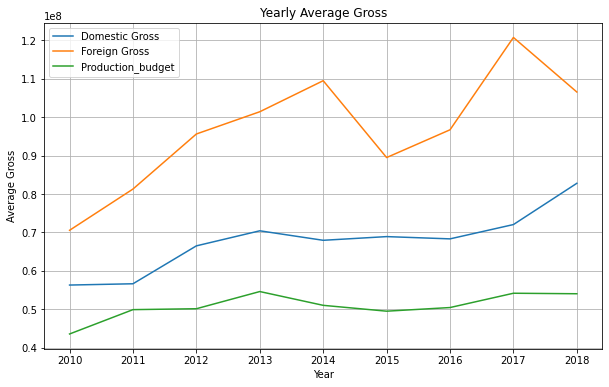

In [607]:
# Line plot of yearly average gross
plt.figure(figsize=(10, 6))
plt.plot(yearly_average_gross.index, yearly_average_gross['domestic_gross_x'], label='Domestic Gross')
plt.plot(yearly_average_gross.index, yearly_average_gross['foreign_gross'], label='Foreign Gross')
plt.plot(yearly_average_gross.index, yearly_average_gross['production_budget'], label='Production_budget')
plt.xlabel('Year')
plt.ylabel('Average Gross')
plt.title('Yearly Average Gross')
plt.legend()
plt.grid(True)
plt.show()

###  Bar plot of top studios by total gross

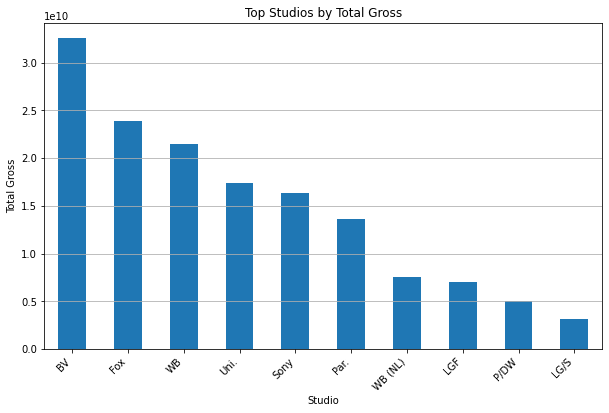

In [608]:
# Bar plot of top studios by total gross
top_studio_gross =Cleaned_dataset_df.groupby('studio')['total_gross'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_studio_gross.plot(kind='bar')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.title('Top Studios by Total Gross')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### Scatter plot of domestic vs. foreign gross

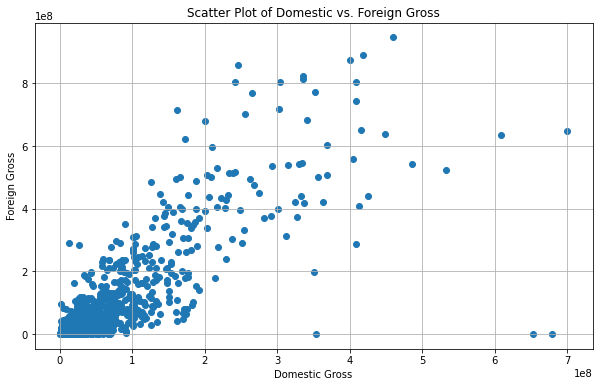

                  domestic_gross_x  foreign_gross
domestic_gross_x          1.000000       0.802492
foreign_gross             0.802492       1.000000


In [609]:
# Scatter plot of domestic vs. foreign gross
plt.figure(figsize=(10, 6))
plt.scatter(Cleaned_dataset_df['domestic_gross_x'], Cleaned_dataset_df['foreign_gross'])
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Scatter Plot of Domestic vs. Foreign Gross')
plt.grid(True)
plt.show()

# Calculate correlation
correlation = Cleaned_dataset_df[['domestic_gross_x', 'foreign_gross']].corr()
print(correlation)

Release date Analysis

release_month
1     8.175050e+07
2     1.414941e+08
3     1.390370e+08
4     1.197039e+08
5     2.734385e+08
6     2.653285e+08
7     2.449594e+08
8     1.121524e+08
9     8.997296e+07
10    1.039462e+08
11    2.214426e+08
12    1.888987e+08
Name: worldwide_gross, dtype: float64


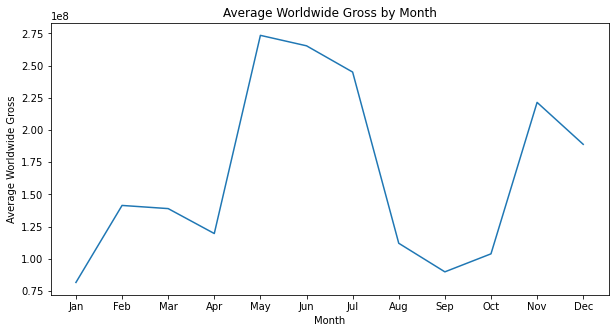

In [610]:
# Convert releasedate to datetime
Cleaned_dataset_df['release_date'] = pd.to_datetime(Cleaned_dataset_df['release_date'])# Extract month and year from release date

Cleaned_dataset_df['release_month'] = Cleaned_dataset_df['release_date'].dt.month
Cleaned_dataset_df['release_year'] = Cleaned_dataset_df['release_date'].dt.year

# Average worldwide gross by month
month_stats = Cleaned_dataset_df.groupby('release_month')['worldwide_gross'].mean()
print(month_stats)


#creating a dictionary to map month numbers to month names
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
# Rename the index using the dictionary
month_stats.index = month_stats.index.map(month_dict)

# Line plot for average worldwide gross by month

plt.figure(figsize=(10, 5))
sns.lineplot(x=month_stats.index, y=month_stats.values)
plt.title('Average Worldwide Gross by Month')
plt.ylabel('Average Worldwide Gross')
plt.xlabel('Month')
plt.show()




### Budget vs. Revenue Analysis

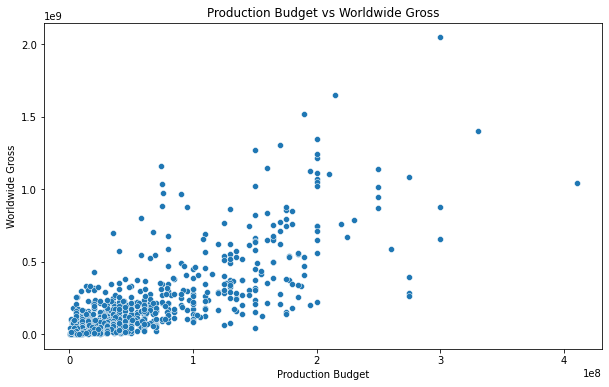

                   production_budget  worldwide_gross
production_budget            1.00000          0.78096
worldwide_gross              0.78096          1.00000


In [611]:
##Budget vs. Revenue Analysis
# Scatter plot for budget vs worldwide gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Cleaned_dataset_df['production_budget'], y=Cleaned_dataset_df['worldwide_gross'])
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

# Calculate correlation
correlation = Cleaned_dataset_df[['production_budget', 'worldwide_gross']].corr()
print(correlation)

### Budget vs. Profit Analysis 

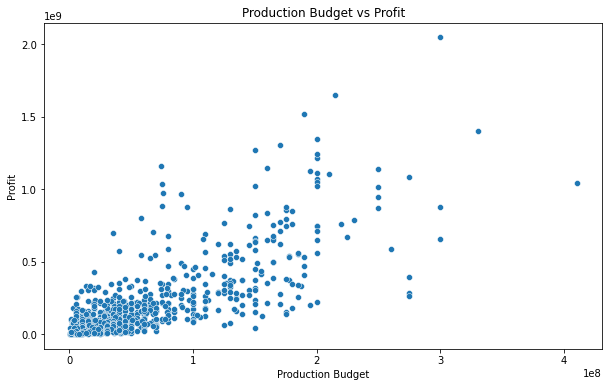

                   production_budget   profit
production_budget            1.00000  0.78096
profit                       0.78096  1.00000


In [612]:

##Budget vs. Revenue Analysis
# Scatter plot for budget vs worldwide gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Cleaned_dataset_df['production_budget'], y=Cleaned_dataset_df['profit'])
plt.title('Production Budget vs Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()

# Calculate correlation
correlation = Cleaned_dataset_df[['production_budget', 'profit']].corr()
print(correlation)

## Recommendation

<b>Partnership Opportunities</b>

* Collaborate with BV Studio As BV studio is the leading studio with the highest grossing films, they could be a valuable partner. Collaborating with or hiring talent from this studio can provide invaluable industry insights and significantly boost credibility.

*  Leverage BV studio's industry experience to understand best practices in film production, marketing strategies, and audience engagement.

 <b>Market Adaptation</b>
 
Foreign markets are showing more revenue potential,  therefore microsoft should consider producing more movies geared towards the  foreign market. They should  invest in multilingual marketing and subtitles/dubbing to maximize reach.


<b> Strategic Release Dates </b>

* Schedule film releases in months that show higher average worldwide gross. For instance, plan major releases in April, May, October, and November to take advantage of these peak seasons.

* Focus on releasing major films during these high-grossing periods to capitalize on increased audience availability and maximize box office returns.

<b> Budget Optimization</b>

 Given the positive correlation between production budget and profit, allocate sufficient budget to production to ensure high-quality outputs. However, balance the budget to avoid excessive spending that doesn't proportionately increase gross.

<b>  Global Market Strategy </b>

Since there is a positive correlation between domestic and foreign gross, create a global marketing strategy that targets both domestic and international audiences. This could involve international premieres, global advertising campaigns, and engaging with global fan communities.


